# Практическое задание
## Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1,  1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
w = np.linalg.inv(X @ X.T) @ X @ y

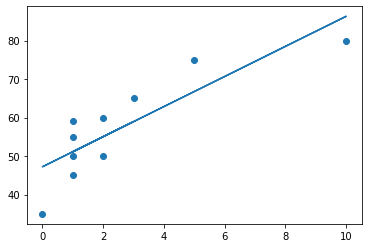

In [5]:
plt.scatter(X[1,:], y)
plt.plot(X[1], w[0] + w[1] * X[1])
plt.show()

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

#### 1. Подберите скорость обучения (alpha) и количество итераций

In [7]:
n = X.shape[1]
w = np.array([1, 0.5])

Данный код поместил в функцию и добавил подсчет дистанции между новым вектором весов и вектором весов с предыдущего шага.

Как только расстояние становится меньше $10^{-8}$, алгоритм останавливаем.

In [8]:
def grad_desc(alpha):
    W = w.copy()
    for i in range(1000):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        old_W = W.copy()

        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))

        weight_dist = np.linalg.norm(W - old_W, ord=2)

#         if i % 30 == 0:
#             print(i, W, err, weight_dist)

        if weight_dist < 1e-8:
            return i, W
            break
    return i, W

Поищем шаг $\alpha$ среди значений  от $0.01$ до $0.07$ с шагом $0.001$

In [9]:
alphas = np.arange(1e-2, 7e-2, 1e-3)

In [10]:
for a in alphas:
    print(a, grad_desc(a))

0.01 (999, array([47.23086913,  3.91094949]))
0.011 (999, array([47.23169769,  3.91079649]))
0.011999999999999999 (999, array([47.23198744,  3.91074298]))
0.012999999999999998 (999, array([47.23208866,  3.91072429]))
0.013999999999999997 (999, array([47.23212398,  3.91071777]))
0.014999999999999996 (999, array([47.23213629,  3.9107155 ]))
0.015999999999999993 (999, array([47.23214057,  3.91071471]))
0.016999999999999994 (999, array([47.23214206,  3.91071443]))
0.017999999999999995 (966, array([47.23214234,  3.91071438]))
0.018999999999999993 (918, array([47.23214238,  3.91071437]))
0.01999999999999999 (874, array([47.2321424 ,  3.91071437]))
0.02099999999999999 (834, array([47.23214242,  3.91071437]))
0.021999999999999992 (798, array([47.23214245,  3.91071436]))
0.02299999999999999 (764, array([47.23214246,  3.91071436]))
0.023999999999999987 (734, array([47.23214248,  3.91071436]))
0.024999999999999988 (706, array([47.2321425 ,  3.91071435]))
0.02599999999999999 (680, array([47.232142

А теперь поищем лучший шаг $\alpha$ среди значений  от $0.062$ до $0.064$ с шагом $0.0001$

In [11]:
alphas = np.arange(.062, .064, 1e-4)

In [12]:
for a in alphas:
    print(a, grad_desc(a))

0.062 (293, array([47.23214272,  3.91071431]))
0.0621 (292, array([47.23214272,  3.91071431]))
0.062200000000000005 (292, array([47.23214272,  3.91071431]))
0.06230000000000001 (291, array([47.23214272,  3.91071431]))
0.06240000000000001 (291, array([47.23214272,  3.91071431]))
0.06250000000000001 (291, array([47.23214272,  3.91071431]))
0.06260000000000002 (290, array([47.23214272,  3.91071431]))
0.06270000000000002 (290, array([47.23214272,  3.91071431]))
0.06280000000000002 (289, array([47.23214272,  3.91071431]))
0.06290000000000003 (289, array([47.23214272,  3.91071431]))
0.06300000000000003 (288, array([47.23214272,  3.91071431]))
0.06310000000000003 (288, array([47.23214272,  3.91071431]))
0.06320000000000003 (287, array([47.23214272,  3.91071431]))
0.06330000000000004 (287, array([47.23214272,  3.91071431]))
0.06340000000000004 (287, array([47.23214273,  3.91071431]))
0.06350000000000004 (286, array([47.23214272,  3.91071431]))
0.06360000000000005 (286, array([47.23214273,  3.9

Получаем, что в данной задаче при $\alpha = 0.0637$ за $285$ шагов дойдем до минимума с заданной точностью $10^{-8}$.

#### 2.* В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [13]:
alpha = 0.0637
W = np.array([1, 0.5])

`np.sum(X * (y_pred - y))` заменил на `X @ (y_pred - y)`

In [14]:
for i in range(301):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#   for ii in range(W.shape[0]):
#       W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))

#   W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))

    W -= alpha * (1/n * 2 * X @ (y_pred - y))
    if i % 30 == 0:
        print(i, W, err)

0 [ 8.01974 22.158  ] 3173.15
30 [42.12976616  5.79122214] 78.19113705241716
60 [46.57198203  4.11261092] 46.32793189825305
90 [47.14704522  3.93324774] 45.9428929854584
120 [47.22120004  3.91331634] 45.93758104968297
150 [47.23073796  3.91102327] 45.937501274581834
180 [47.23196268  3.91075178] 45.937500020491576
210 [47.23211977  3.91071891] 45.93750000033283
240 [47.2321399   3.91071486] 45.937500000005414
270 [47.23214248  3.91071436] 45.93750000000008
300 [47.23214281  3.91071429] 45.93749999999999


#### 3.* Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn)

In [15]:
def grad_desc_2(alpha):
    W = w.copy()
    max_iter = 10000  # Ограничение числа итераций для избежания зацикливания
    min_err_dist = 1e-8  # критерий сходимости (разница ошибок, при которой алгоритм останавливается)
    err = np.inf  # Начальная ошибка
    iter_num = 0
    
    for i in range(max_iter):
        y_pred = np.dot(W, X)
        W -= alpha * (1/n * 2 * X @ (y_pred - y))
            
        err_new = calc_mse(y, y_pred)
        err_dist = err - err_new
        if err_dist < min_err_dist:
            break
        
        err = err_new
        
        if i % 10 == 0:
            print(f'{i:<5} {str(W):<27} {err:<14.8f} {err_dist:.8f}')

    return i, W, err, err_dist

In [16]:
grad_desc_2(.0637)

0     [ 8.01974 22.158  ]         3173.15000000  inf
10    [27.34592281 12.42696124]   714.68292287   110.93253667
20    [37.15543166  7.90342597]   191.47361195   23.83801148
30    [42.12976616  5.79122214]   78.19113705    5.21430864
40    [44.65014667  4.80046746]   53.21692160    1.16159317
50    [45.92625981  4.33360951]   47.60957850    0.26349548
60    [46.57198203  4.11261092]   46.32793190    0.06081506
70    [46.89854838  4.00752124]   46.03002752    0.01426255
80    [47.06362933  3.95732642]   45.95971467    0.00339315
90    [47.14704522  3.93324774]   45.94289299    0.00081737
100   [47.18918086  3.92164893]   45.93882144    0.00019899
110   [47.21045829  3.91603947]   45.93782626    0.00004887
120   [47.22120004  3.91331634]   45.93758105    0.00001209
130   [47.22662169  3.91198969]   45.93752023    0.00000301
140   [47.22935759  3.91134122]   45.93750507    0.00000075
150   [47.23073796  3.91102327]   45.93750127    0.00000019
160   [47.23143431  3.91086694]   45.9375003

(172,
 array([47.23183127,  3.91077997]),
 45.93750007064501,
 9.079592189209507e-09)